# CMSC320 Final Project: Analyzing Food Price Data
## By Richard Zhou and Daniel Zhu
Rubric: https://cmsc320.github.io/files/cmsc320_f2021_final_rubric.pdf
1. Motivation. Does the tutorial make the reader believe the topic is relevant or important (i) in general and (ii) with respect to data science?
2. Understanding. After reading through the tutorial, does an uninformed reader feel informed about the topic? Would a reader who already knew about the topic feel likes/he learned more about it?
3. Other resources. Does the tutorial link out to other resources (on the web, in books, etc) that would give a lagging reader additional help on specific topics, or an advanced reader the ability to dive more deeply into a specific application area or technique? 2
4. Prose. Does the prose portion of the tutorial actually add to the content of the deliverable?
5. Code. Is the code well written, well documented, reproducible, and does it help the reader understand the tutorial? Does it give good examples of specific techniques?
6. Subjective evaluation. If somebody linked to this tutorial from, say, Hacker News, would people actually read through the entire thing?



# Introduction
Food prices are an integral part of the lives of every individual, no matter how rich they are. By looking at food prices, one can gauge the relative economic situation of a nation and see how the average cost of living changes over time.
In this tutorial, we will be examining the changes in food prices over time from 1974 to 2020, examining the average change in price paid for different types of food, from meats such as pork and beef to sweets. Average change in price paid by urban consumers is known as the Consumer Price Index (CPI), measured in percentage relative to a base year (100%) (<a href="www.bls.gov/cpi/">bls.gov</a>). "It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them." (<a href="https://www.investopedia.com/terms/c/consumerpriceindex.asp#:~:text=The%20Consumer%20Price%20Index%20(CPI)%20is%20a%20measure%20that%20examines,of%20goods%20and%20averaging%20them.">investopedia.com</a>) (eg. fruit CPI might include changes in cost of apples, bannanas, fresh and processed fruit, etc). CPI changes are associated with cost of living.<br> <br>
The data comes from <a href="www.ers.usda.gov/data-products/food-price-outlook.aspx.">ers.usda.gov</a> The CPI for food measures the changes in retail price of food items over time. <br> <br>
The data table contains the percent change in CPI annually for various food items (<a href="https://www.investopedia.com/terms/r/reference_base_period.asp">investopedia.com</a>). <br>
##### CPI Annual Percent Change = (CPI(year) - CPI(previous year))/CPI(previous year) <br>
This is simply the change in consumer price of goods by year.

# Getting the Data
For starters, we will want to import some useful python libraries.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Now we need to get our data. Our data comes from <a href="www.ers.usda.gov/data-products/food-price-outlook.aspx.">ers.usda.gov</a>, "Annual percent changes in selected Consumer Price Indexes, 1974 through 2020." <br> <br> The CPIDataCleaned.xlsx simply removes some of the unnecessary rows and columns so the data is read properly when using pandas.read_excel(). You can download the data directly from the cite itself and remove the extra rows and columns in excel or use the provided CPIDataCleaned.xlsx file. <br> <br>

In [162]:
# First, getting the data from https://www.ers.usda.gov/data-products/food-price-outlook.aspx
# We will be looking at the historical CPI to the changes to food prices over time from 1974 to 2020

# CPIDataCleaned is an excel file that removes some of the unnecessary rows/columns from the original dataset

data = pd.read_excel("CPIDataCleaned.xlsx")
data.head()

,Consumer Price Index item,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,All food,14.3,8.5,3.0,6.3,9.9,11.0,8.6,7.8,4.1,...,3.7,2.6,1.4,2.4,1.9,0.3,0.9,1.4,1.9,3.4
1,Food away from home,12.7,9.4,6.8,7.6,9.1,11.1,9.9,9.0,5.4,...,2.3,2.8,2.1,2.4,2.9,2.6,2.3,2.6,3.1,3.4
2,Food at home,14.9,8.2,2.1,5.9,10.5,10.8,8.1,7.2,3.5,...,4.8,2.5,0.9,2.4,1.2,-1.3,-0.2,0.4,0.9,3.5
3,"Meats, poultry, and fish",2.2,8.5,0.9,-0.6,16.7,14.9,3.7,4.1,4.1,...,7.4,3.6,2.1,7.2,1.9,-3.5,-0.1,0.7,1.0,6.3
4,Meats,1.8,8.5,0.2,-2.3,18.6,17.0,2.9,3.6,4.9,...,8.8,3.4,1.2,9.2,3.0,-4.4,-0.6,0.4,1.3,7.4


You should now have your data stored in a pandas dataframe (called "data" in the example code) as seen above.

Inflation calculator: https://www.bls.gov/data/inflation_calculator.htm - if we want to try to adjust the changes with inflation rates



# Data Cleaning


In [163]:
# We are transposing the dataframe so we can create a violin plot of it based on a year column.
data_t = data.transpose()
data_t.columns = data_t.iloc[0]
data_t.drop(["Consumer Price Index item"], axis = 0, inplace = True)
#data_t.reset_index(inplace=True)
#data = data.rename(columns = {'index':'Year'})
data_t.head()


Consumer Price Index item,All food,Food away from home,Food at home,"Meats, poultry, and fish",Meats,Beef and veal,Pork,Other meats,Poultry,Fish and seafood,...,Fats and oils,Fruits and vegetables,Fresh fruits and vegetables,Fresh fruits,Fresh vegetables,Processed fruits and vegetables,Sugar and sweets,Cereals and bakery products,Nonalcoholic beverages,Other foods
1974,14.3,12.7,14.9,2.2,1.8,2.9,-0.5,3.1,-5.1,15.3,...,41.9,16.5,7.8,8.7,7.3,NaN,52.4,29.9,19.3,21.4
1975,8.5,9.4,8.2,8.5,8.5,1.0,22.4,5.9,10.5,8.5,...,10.7,3.1,2.3,6.8,-1.1,NaN,26.1,11.3,15.0,12.8
1976,3.0,6.8,2.1,0.9,0.2,-3.2,1.3,5.9,-4.1,11.7,...,-12.5,2.6,2.4,-0.2,4.3,NaN,-11.3,-2.2,19.6,4.1
1977,6.3,7.6,5.9,-0.6,-2.3,-0.7,-5.4,-0.6,0.7,10.8,...,10.1,9.2,13.6,14.9,12.6,NaN,5.0,1.6,50.6,3.4
1978,9.9,9.1,10.5,16.7,18.6,22.9,12.9,17.7,10.4,9.4,...,9.6,11.1,12.9,19.5,8.0,NaN,12.3,9.0,5.8,8.0


# Exploratory Data Analysis
We want to see how the CPI changes for all food so that we have an idea of what to try and look for once we start using machine learning. To do so, we are going to create a violin plot for each year to plot the distribution of points to see how the change in CPI shift over time and see if there are any discernable trends

/Applications/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


'\nfigure, axis = plt.subplots(len(data))\nfor i, col in enumerate(data.columns):\n    axis[i].plot(data.index, data[col])\n'

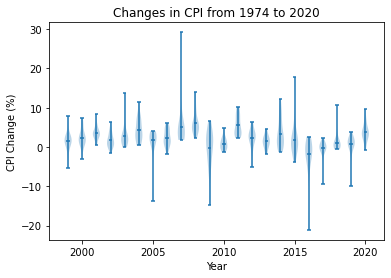

In [164]:
# Creating the violin plot
# list of years
years = list(data_t.index)
# list of lists - each of the sublists are the CPI change for the corresponding year
cpi_year = data_t.values.tolist()
#print(len(years))
#print(len(cpi_year))

fig, ax = plt.subplots()

ax.violinplot(cpi_year,years, widths = .5, showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("CPI Change (%)")
ax.set_title("Changes in CPI from 1974 to 2020")
"""
figure, axis = plt.subplots(len(data))
for i, col in enumerate(data.columns):
    axis[i].plot(data.index, data[col])
"""

Note that our graph starts from 1999 and not 1974, since "Processed fruits and vegetables" have N/A values up till 1998. 

There does not seem to be any major shift in the overall CPI changes over time. Since these values represents changes in CPI, the price of food generally has steadily increase, though this could easily be attributed to inflation over time. We will next look at each of the food types to see how they have changed over time.

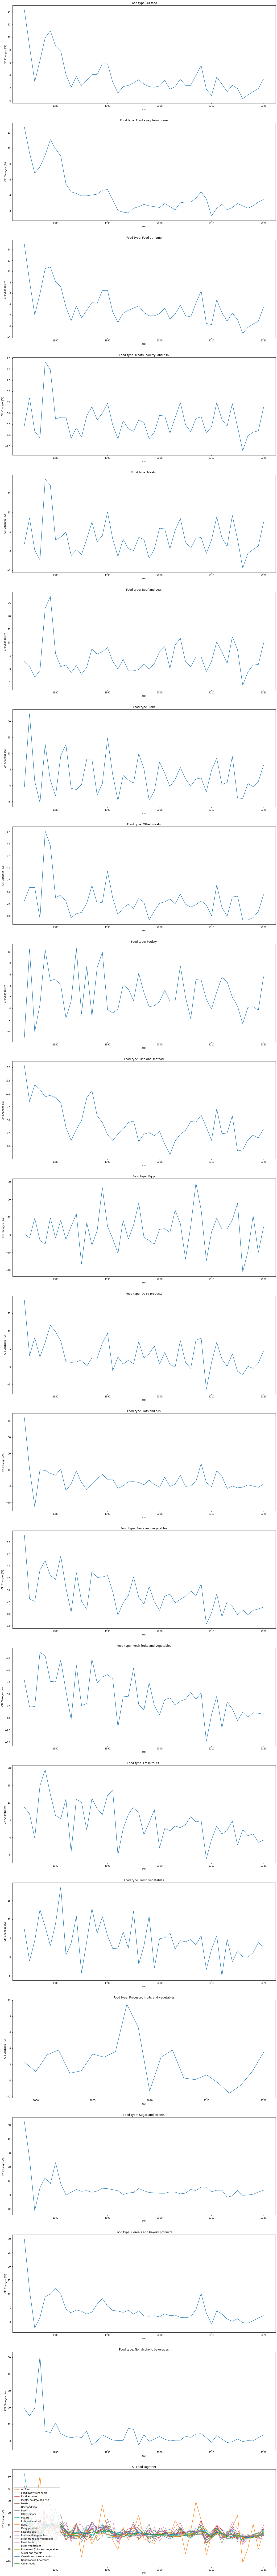

In [179]:
figure, axis = plt.subplots(len(data_t.columns), figsize = (20,200))
for i, col in enumerate(data_t.columns):
    #print(col)
    axis[i].plot(data_t.index, data_t[col])
    axis[i].set_title(f'Food type: {col}')
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('CPI Changes (%)')

# Plotting all of the changes on one graph
for col in data_t.columns:
    #print(col)
    plt.plot(data_t.index, data_t[col], label = col)
plt.title(f'All Food Together')
plt.xlabel('Year')
plt.ylabel('CPI Changes (%)')
plt.legend()

In many of the previous graphs, the changes were very large in the late 1900s before decreasing going into the early 2000s. The graphs also showcase many dynamic changes, constantly fluctuating between positive and negative values for some of the CPI changes.

What would this look like from an absolute perspective? To answer this, we will assume that the price for any food starts at 1 from 1974 and see how the absolute price for each of the food changes over time.

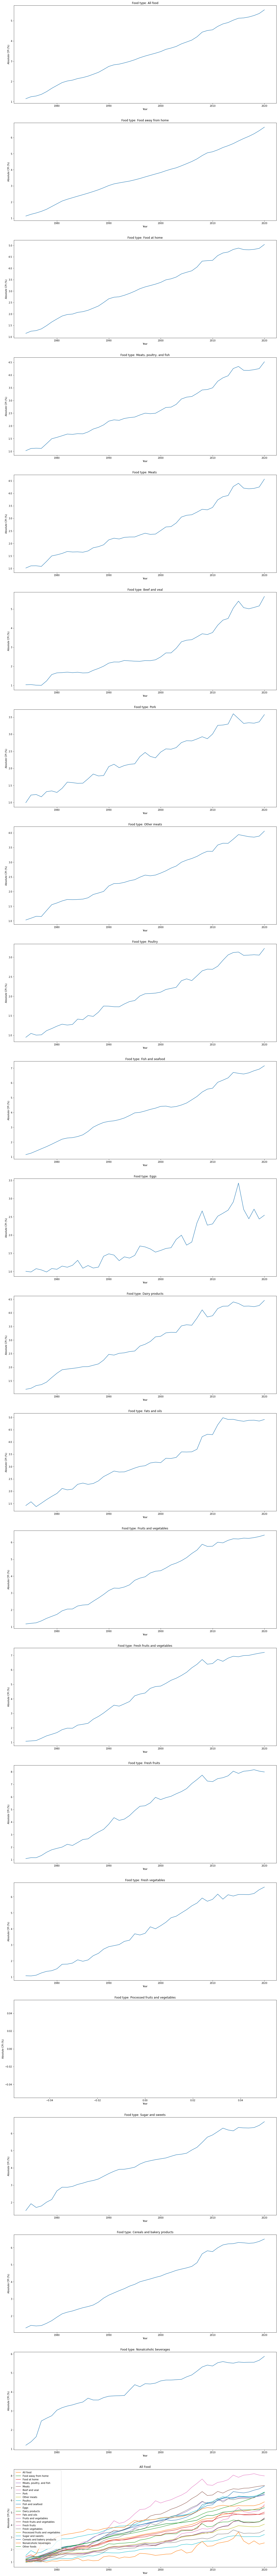

In [180]:
abs_data = pd.DataFrame()
figure, axis = plt.subplots(len(data_t.columns), figsize = (20,200))
#print(data_t.columns)
for i, col in enumerate(data_t.columns):
    curr_val = 1
    values = []
    for val in data_t[col]:
        curr_val = curr_val + curr_val*(val/100)
        values.append(curr_val)
    #print(values)
    #print(data_t.index)
    abs_data[col] = pd.Series(values, index = data_t.index)
    axis[i].plot(abs_data.index, abs_data[col])
    axis[i].set_title(f'Food type: {col}')
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('Absolute CPI (%)')
#print(abs_data.head())

# Plotting all of the changes on one graph
for col in abs_data.columns:
    #print(col)
    plt.plot(abs_data.index, abs_data[col], label = col)
plt.title(f'All Food')
plt.xlabel('Year')
plt.ylabel('Absolute CPI (%)')
plt.legend()

As seen from the above graphs, the prices for all foods have been steadily increasing throughout the years, with many of the graphs having a spike around 1990 and 2008,  with a shallow dip around the years leading up to 2020. The spike around 2008 could be related to the 2008 global financial crisis, causing food prices to spike up, albeit temporary. The data does not extend long enough to see how the COVID-19 pandemic has affected food prices, but futhur updates to the data can clarify that aspect.